# Plotting with Seaborn

Graph gallery: \
https://seaborn.pydata.org/examples/index.html \
https://www.python-graph-gallery.com/

Getting started with Python/Anaconda and Jupyter notebook: \
https://docs.anaconda.com/anaconda/user-guide/getting-started/ \
https://docs.jupyter.org/en/latest/start/index.html

## Load packages and import data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import functions_seaborn_demo as func

In [2]:
group_stats = pd.read_excel('group_stats.xlsx')
group_stats.head()

,participant,movement_type,adaptation_modality,test_modality,adaptation_delay,thresholds,slopes,widths
0,1,Active,Visual,Visual,0 ms,312.887767,0.002394,548.263392
1,1,Active,Visual,Visual,150 ms,333.885424,0.002021,618.192115
2,1,Active,Auditory,Auditory,0 ms,432.666344,0.002092,627.397207
3,1,Active,Auditory,Auditory,150 ms,342.698149,0.002227,589.214339
4,1,Active,Visual,Auditory,0 ms,275.220563,0.005938,221.015043


## Plotting with categorical data

**Example:**
Plotting the difference in delay detection thresholds between active and passive movement conditions.

**Defining the figure style:**

In [3]:
# set the style of the plot; options: whitegrid, darkgrid, white, dark, ticks
sns.set_style("whitegrid") 

# set the context of the plot; options: paper, notebook, talk, poster
sns.set_context("paper", font_scale = 1.75)

**Seaborn plotting function and finetuning with Matplotlib (plt):**

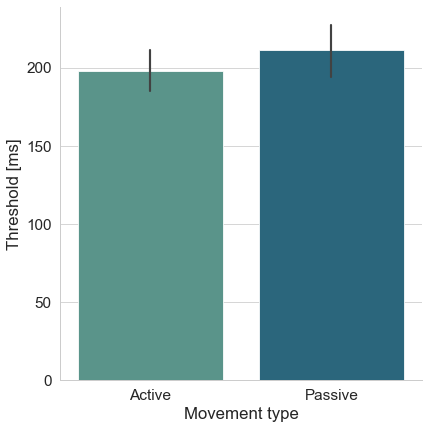

In [4]:
# defining a simple categorical plot
plot = sns.catplot(data = group_stats,  # dataset that is used for plotting
                   x = 'movement_type', # categorical variable
                   y = 'thresholds',    # dependent variable
                   kind = 'bar',        # kind of plot; options: bar, violin, box, boxen, strip, swarm, point
                   height = 6,          # size of the plot
                   palette = 'crest')   # using a predifined color palette    
                   #palette = {'Active': 'blue', 'Passive': 'red'}) # defining colors manually
                    
# finetuning
plt.ylabel('Threshold [ms]')  # defining label of y axis
plt.xlabel('Movement type')   # defining label of x axis
plt.show()                    # show the plot

**Adding a second categorical variable:**

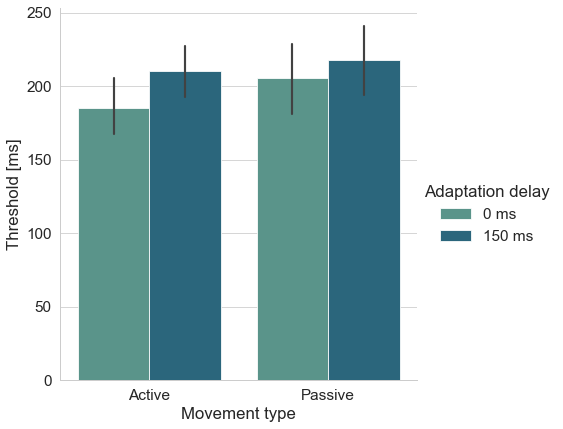

In [20]:
sns.set_style("whitegrid") 
sns.set_context("paper", font_scale = 1.75)

plot = sns.catplot(data = group_stats,  
                   x = 'movement_type', 
                   y = 'thresholds',    
                   hue = 'adaptation_delay', # additional categorical variable
                   kind = 'bar',  
                   height = 6,          
                   palette = 'crest')   
                   
plot._legend.set_title('Adaptation delay') 
plt.ylabel('Threshold [ms]')  
plt.xlabel('Movement type')   
plt.show()                    

**Adding a third categorical variable:**

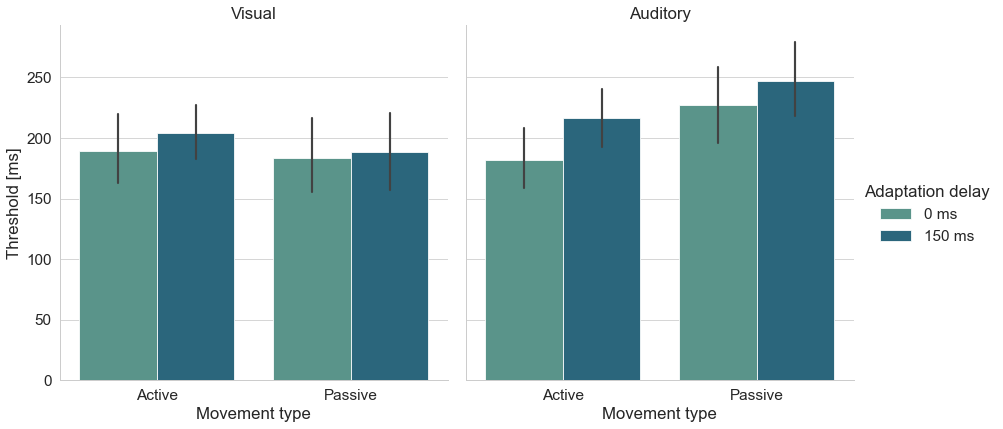

In [22]:
sns.set_style("whitegrid") 
sns.set_context("paper", font_scale = 1.75)

plot = sns.catplot(data = group_stats,  
                   x = 'movement_type', 
                   y = 'thresholds',    
                   hue = 'adaptation_delay', # additional categorical variable
                   col = 'test_modality',    # additional categorical variable
                   kind = 'bar',        
                   height = 6,          
                   palette = 'crest')   
                   
plot.set_titles("{col_name}", fontsize = 15)
plot._legend.set_title('Adaptation delay') 
plot.axes.flat[0].set_ylabel('Threshold [ms]')
for axis in range(2): plot.axes.flat[axis].set_xlabel('Movement type')
plt.show()                    

**Using a function for creating all possible combinations of plots:** 

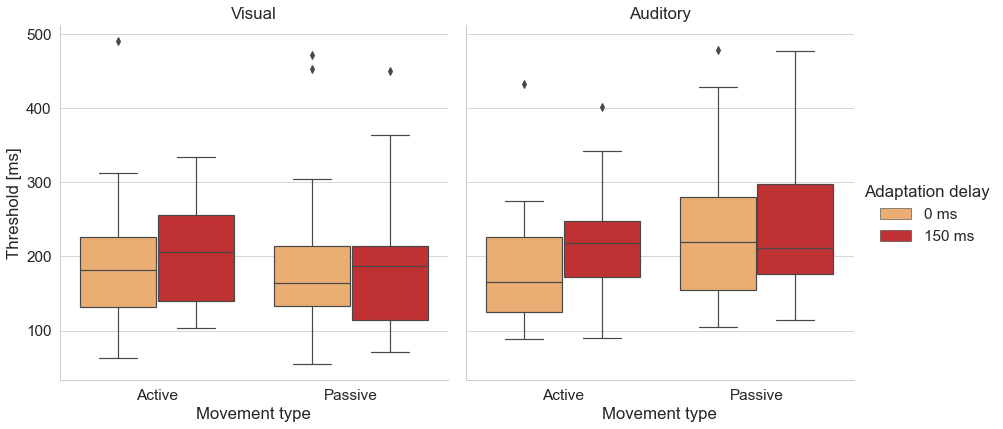

In [13]:
func.cat_plots(data = group_stats, 
               plot_type = 'box',
               factor = 'movement_type',
               measure = 'thresholds', 
               hue = 'adaptation_delay',
               col = 'test_modality')

### Different plot types for categorical data

#### Categorical estimate plots

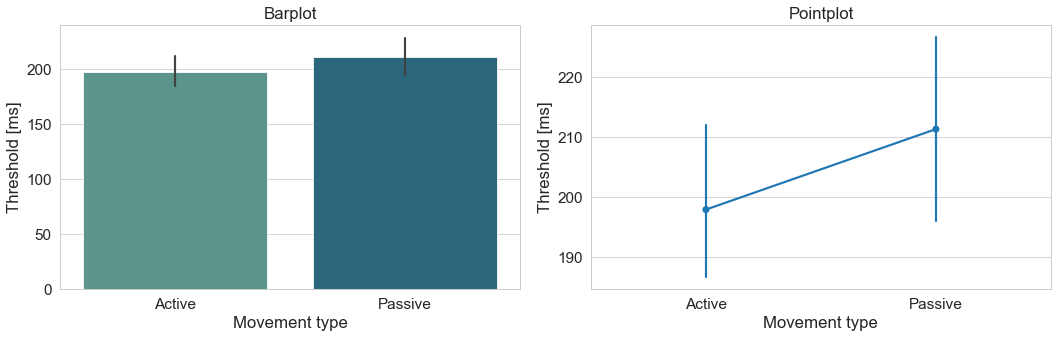

In [9]:
func.plot_types(plot_type = 'estimate', data = group_stats)

#### Categorical distribution plots

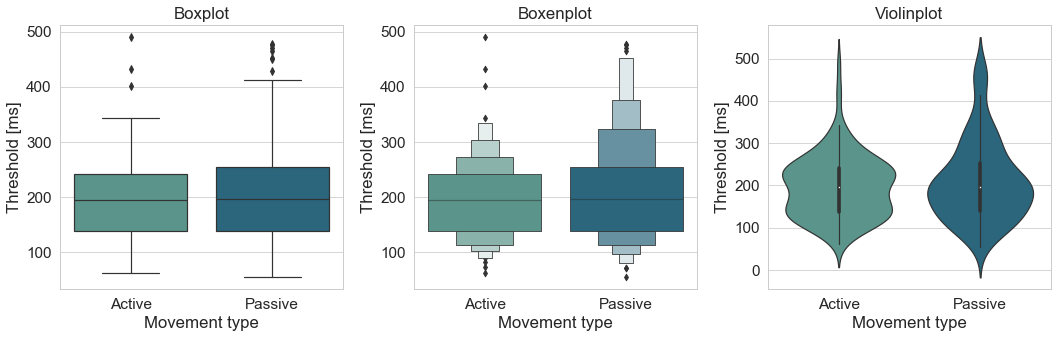

In [10]:
func.plot_types(plot_type = 'distribution', data = group_stats)

#### Categorical scatterplots

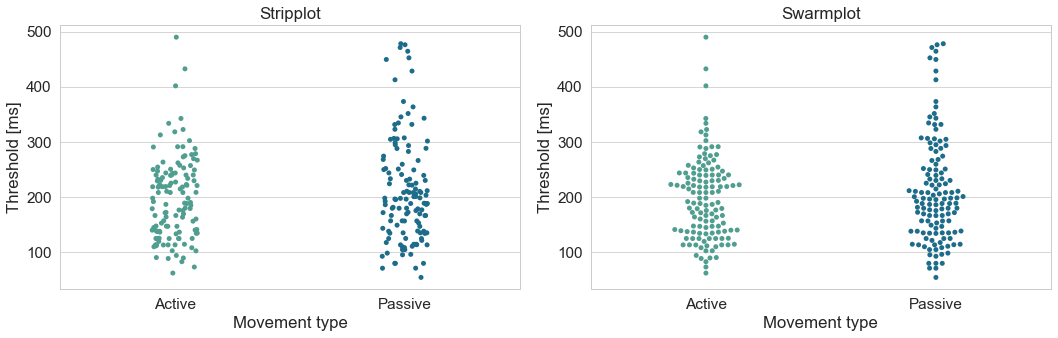

In [11]:
func.plot_types(plot_type = 'scatter', data = group_stats)

## Visualizing distributions of data

In [9]:
trial_data = pd.read_excel('single_trial_data.xlsx')
trial_data.head()

,adaptation_modality,participant,run,trial,movement_type,test_modality,adaptation_delay,test_delay,responses,movement_durations,movement_latencies
0,Auditory,1,1,1,Passive,Visual,0 ms,83,0,547.46,717
1,Auditory,1,1,2,Passive,Visual,0 ms,417,1,588.87,177
2,Auditory,1,1,3,Passive,Visual,0 ms,333,0,546.04,718
3,Auditory,1,1,4,Passive,Visual,0 ms,0,0,543.27,1222
4,Auditory,1,1,5,Passive,Visual,0 ms,250,0,543.11,1222


**Histogram:**

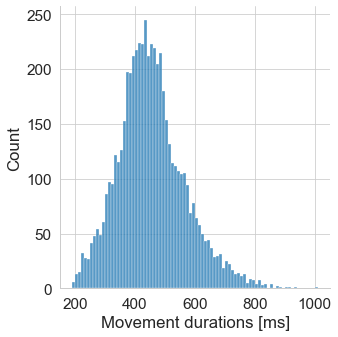

In [10]:
sns.set_style("whitegrid") 
sns.set_context("paper", font_scale = 1.75)

data_to_plot = trial_data[trial_data['movement_type'] == 'Active']

plot = sns.displot(data = data_to_plot, 
                   x = "movement_durations", 
                   binwidth = 10)

plt.xlabel('Movement durations [ms]')
plt.show()

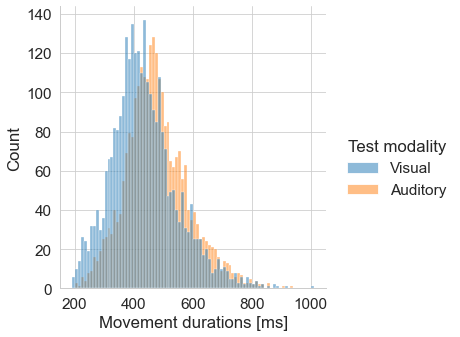

In [11]:
sns.set_style("whitegrid") 
sns.set_context("paper", font_scale = 1.75)

data_to_plot = trial_data[trial_data['movement_type'] == 'Active']

plot = sns.displot(data = data_to_plot, 
                   x = "movement_durations",
                   hue = 'test_modality',
                   binwidth = 10)

plot._legend.set_title('Test modality') 
plt.xlabel('Movement durations [ms]')
plt.show()

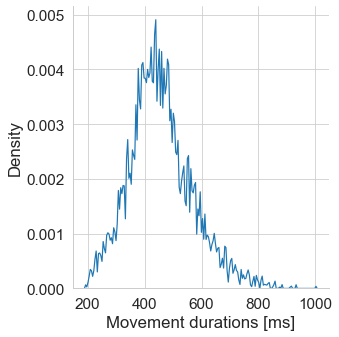

In [12]:
sns.set_style("whitegrid") 
sns.set_context("paper", font_scale = 1.75)

data_to_plot = trial_data[trial_data['movement_type'] == 'Active']

plot = sns.displot(data = data_to_plot, 
                   x = "movement_durations", 
                   kind = 'kde', 
                   bw_adjust = .05)

plt.xlabel('Movement durations [ms]')
plt.show()

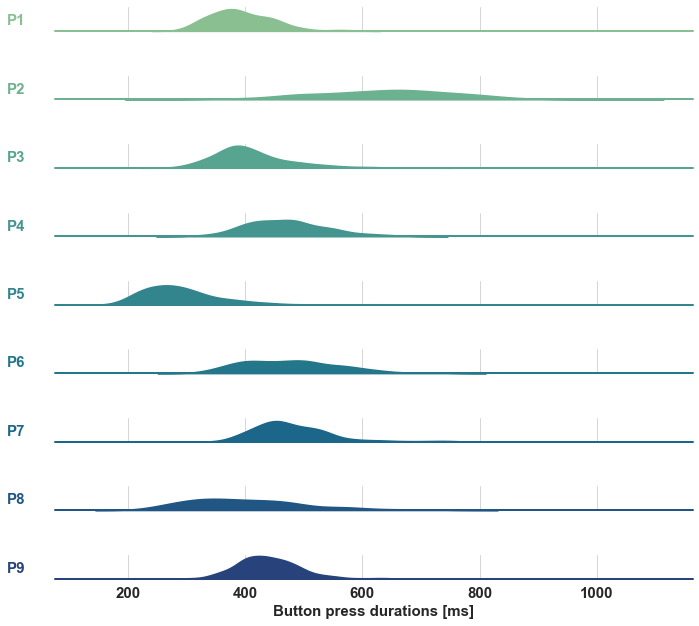

In [16]:
plot_indiv_ppnr = data_to_plot[data_to_plot['participant'] < 10]

func.plot_dist(data = plot_indiv_ppnr, 
               measure = 'movement_durations')

## Visualizing statistical relationships

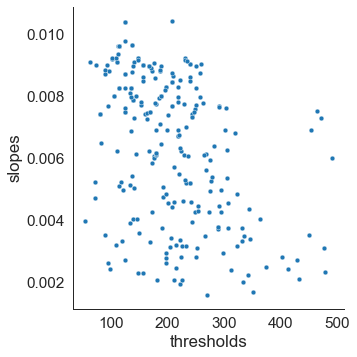

In [30]:
sns.relplot(x="thresholds", y="slopes", data=group_stats);

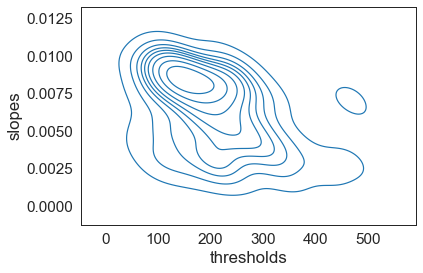

In [27]:
# Contour plot

# set seaborn style
sns.set_style("white")

# Basic 2D density plot
sns.kdeplot(x = 'thresholds', y = 'slopes', data = group_stats) #cmap="Reds", shade=True, bw_adjust=.5)
plt.show()

In [28]:
# set seaborn style
sns.set_style("white")

# Histogram...
sns.hist(x = 'thresholds', y = 'slopes', data = group_stats) #cmap="Reds", shade=True, bw_adjust=.5)
plt.show()

AttributeError: module 'seaborn' has no attribute 'hist'

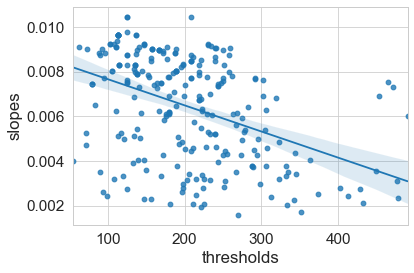

In [19]:
ax = sns.regplot(x = "thresholds", y = "slopes", data = group_stats)

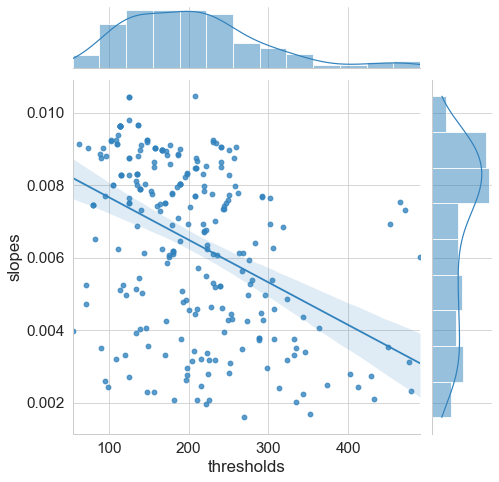

In [20]:
# reg, hex

g = sns.jointplot(x="thresholds", y="slopes", data = group_stats,
                  kind="reg",
                  color=(49/255,130/255,189/255), height=7)

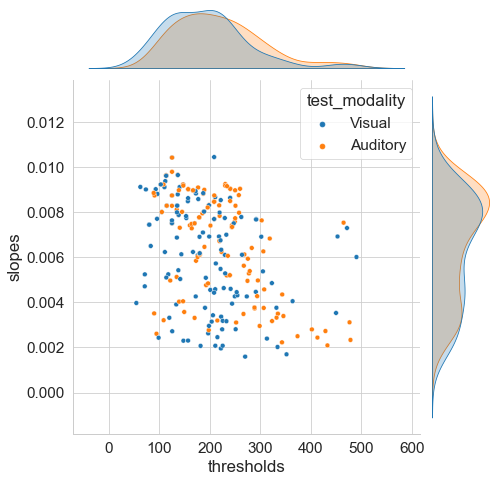

In [22]:
g = sns.jointplot(x="thresholds", y="slopes", hue = 'test_modality', data=group_stats,
                  color=(49/255,130/255,189/255), height=7)
g.ax_marg_x.set_axis_off()
g.ax_marg_y.set_axis_off()

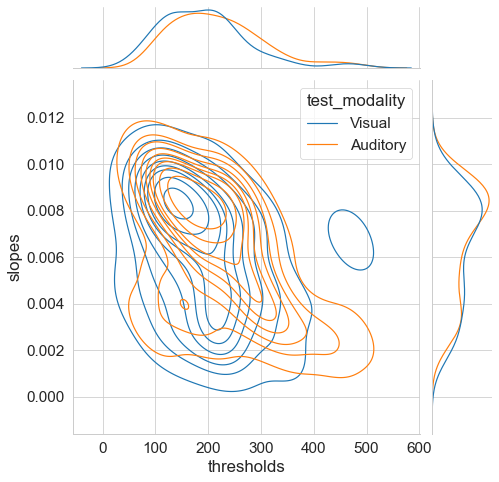

In [25]:
 #kde, hist

g = sns.jointplot(x="thresholds", y="slopes", hue = 'test_modality', data=group_stats,
                  color=(49/255,130/255,189/255), height=7, kind="kde")

## Plotting time courses

<AxesSubplot:xlabel='trial', ylabel='movement_durations'>

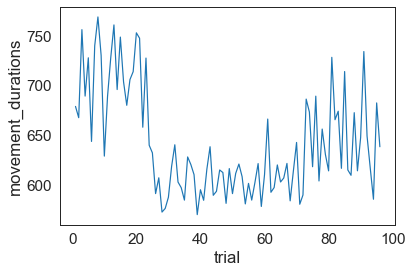

In [32]:
plotting_data = trial_data[(trial_data['participant'] == 2) & 
                           (trial_data['adaptation_modality'] == 'Auditory')]

sns.lineplot(x="trial", y="movement_durations", data=plotting_data, ci=None)

In [ ]:
## show simple statistics with statsmodels (& check correspondance with spss/jasp)
# also get effect size? post-hoc tests? also pinguin possible?
# wenn nicht möglich -> weglassen!